# TME IAR: Robotique Évolutionniste

* Étudiant 1: Nom: QIU Prénom: QI
* Étudiant 2: Nom: KLEINPETER Prénom: FELIX

Dans ce TME vous allez utiliser le code développé lors de la séance précédente pour étudier les différentes questions qui peuvent se soulever lorsque l'on réalise un apprentissage de politique.

Vous pourrez, au choix, mettre votre code dans des cellules du notebook, ou bien les mettre dans un script python.

Vous devrez envoyer à stephane.doncieux@sorbonne-universite.fr vos fichiers (notebook avec figures générées et scripts python et autres fichiers indispensables pour reproduire vos résultats. **ATTENTION** merci de mettre comme sujet: \[TME IAR\] nom1 et nom2, au risque que votre mail soit perdu dans les limbes...

Les algorithmes évolutionnistes sont des algorithmes stochastiques. Cela signifie que deux expériences avec le même code et les mêmes paramètres peuvent avoir des résultats différents. En conséquence, il ne faut pas tirer de conclusions sur la base d'une seule expérience car la variabilité dans les résultats peut être importante. Étant en temps limité sur des machines de puissance moyenne, il ne vous est pas demandé de réaliser les dizaines d'expériences qui seraient normalement nécessaires. Vous essayerez par contre, dans la mesure du possible, de vérifier que vos résultats sont cohérents sur 2 ou 3 expériences. 

In [152]:
# Note: l'import d'un fichier ne se fait qu'une seule fois. Si vous modifiez ce fichier, 
# il vous faut redémarrer votre kernel si vous voulez prendre en compte les modifications.
# vous pouvez éviter cela de la façon suivante: 
import importlib # une seule fois
import plot # le module doit avoir été importé une première fois
importlib.reload(plot) # cette ligne permet de charger la dernière version
import numpy
import matplotlib.pyplot as plt
import pickle

def plo(position_record,nameimg):
    heatmap = numpy.ones((120,120))
    for i in range(10):
        for position in position_record:
            x = int(position[0]) // 5
            y = int(position[1]) // 5
            heatmap[y][x] += 1
    plt.imshow(heatmap)
    plt.savefig(nameimg)
    plt.show()

def stock(data,path):
    # open a file, where you ant to store the data
    file = open(path, 'wb')     # le 07 nov  X:Y
    # dump information to that file
    pickle.dump(data, file)
    # close the file
    file.close()
# pour que les figures apparaissent directement dans le notebook
%matplotlib inline 

## Algorithmes Évolutionnistes multi-objectifs

**1-** À l'aide du framework DEAP, implémentez NSGA-II et testez le avec des fonctions benchmarks (par exemple `schaffer_mo`). ** Vous complèterez le fichier `nsga-2.py` **. Vous tracerez un front de pareto obtenu par une de vos expériences.

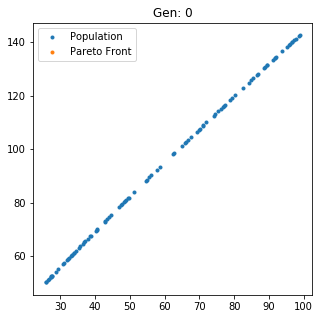

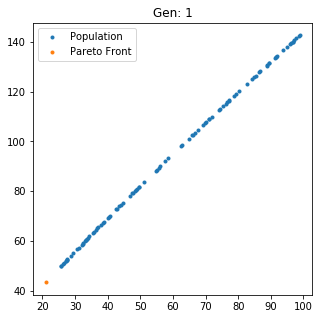

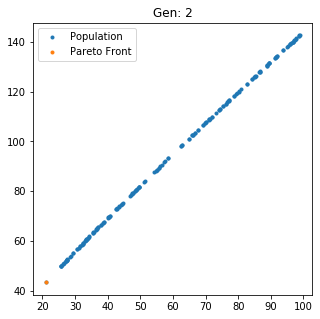

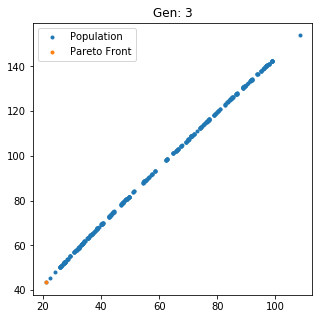

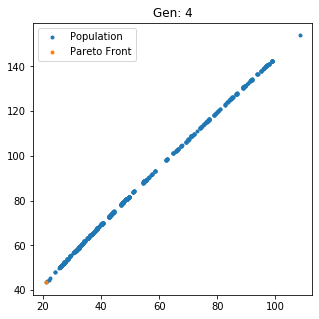

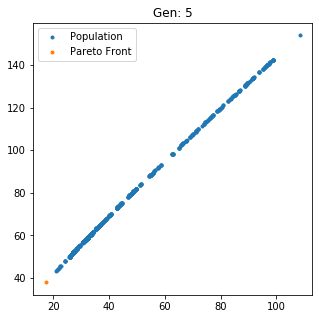

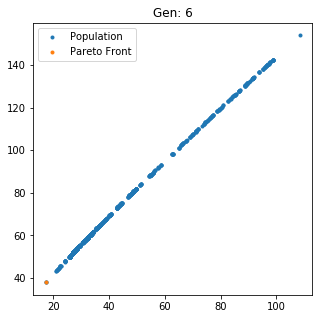

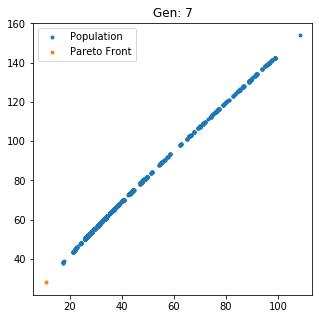

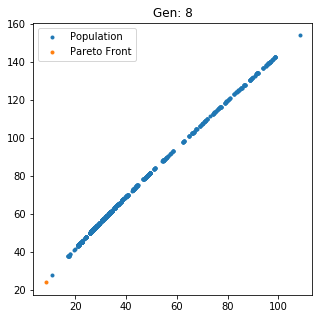

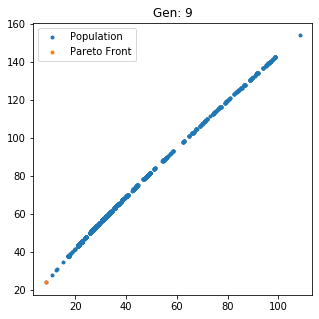

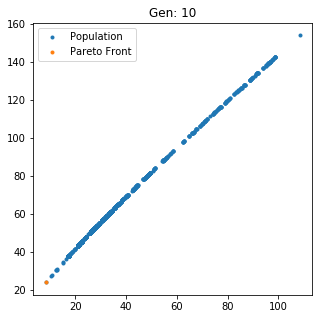

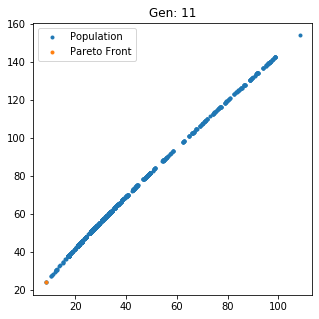

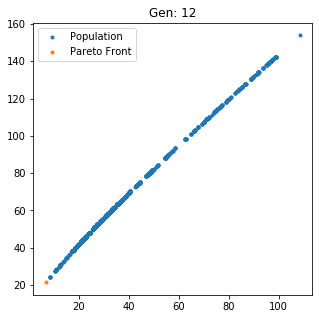

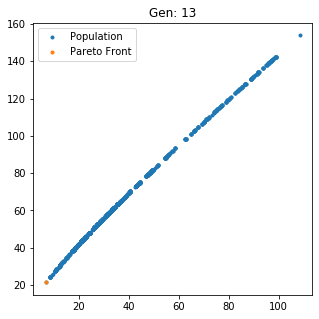

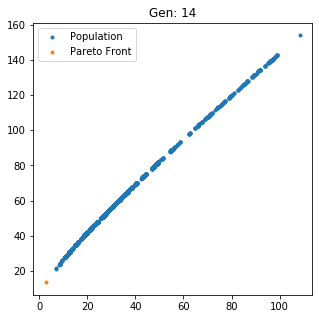

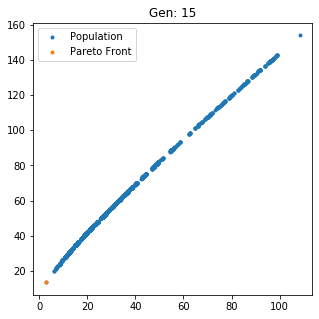

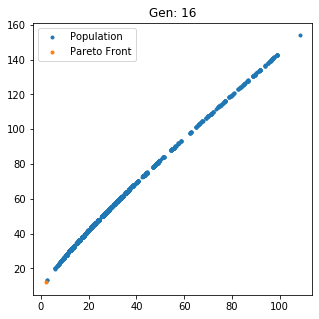

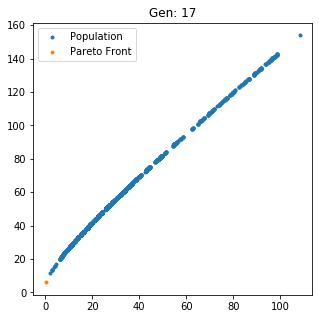

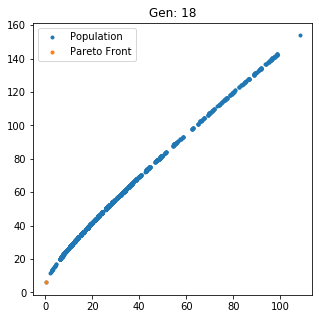

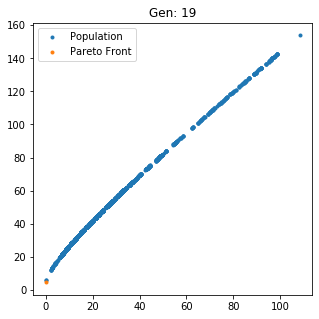

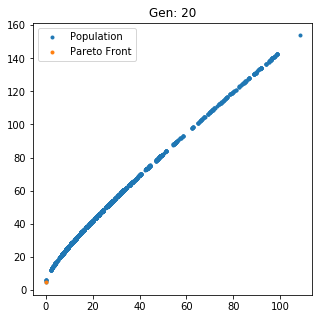

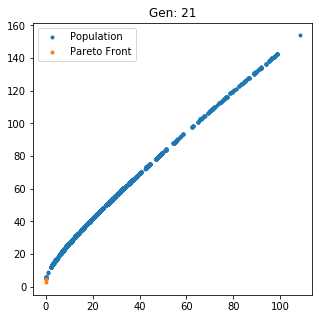

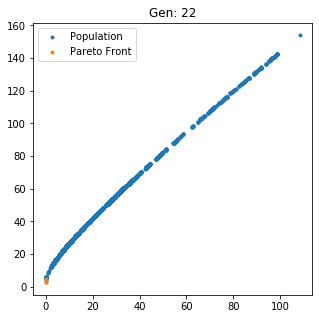

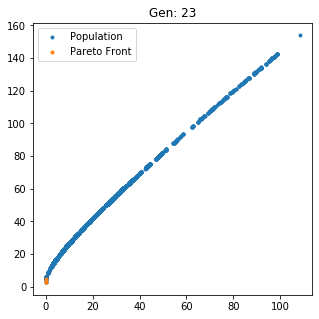

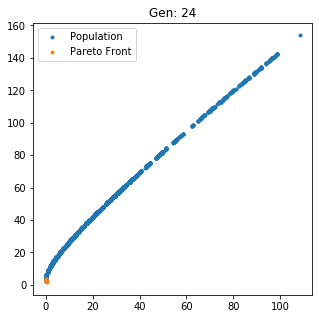

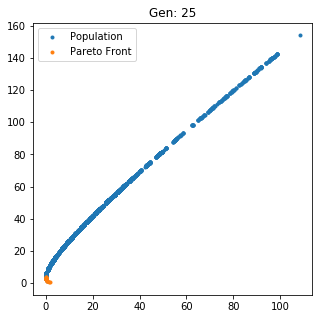

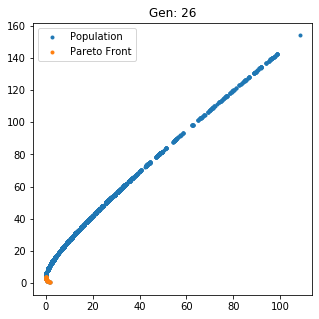

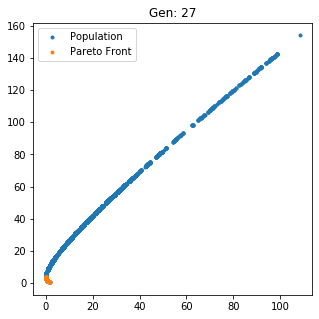

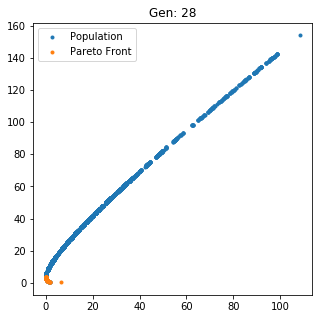

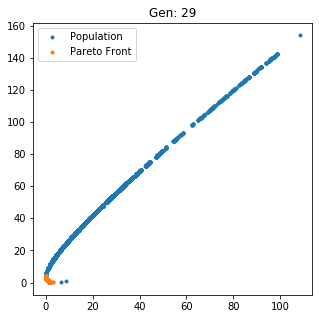

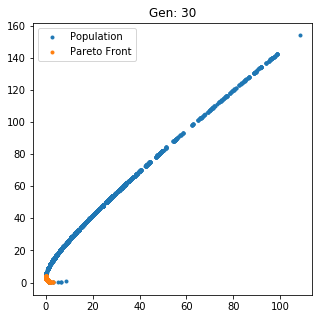

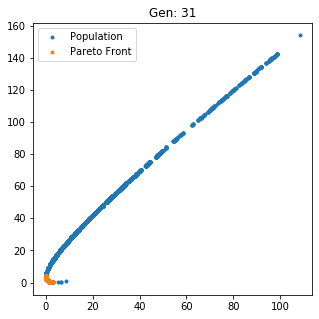

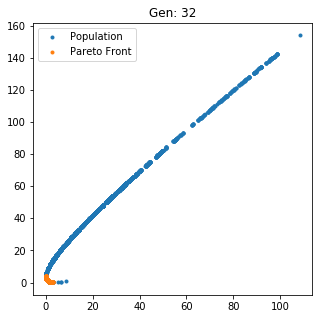

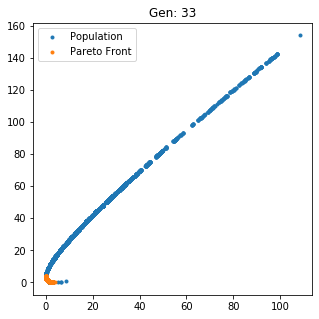

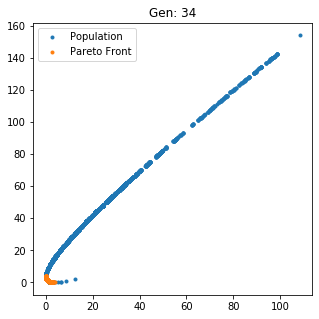

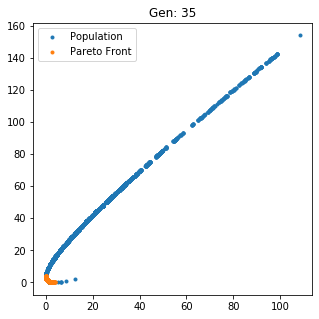

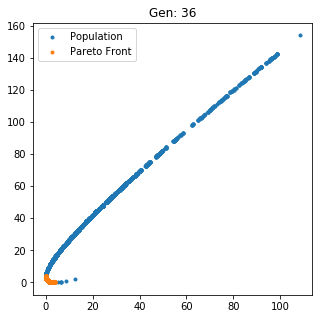

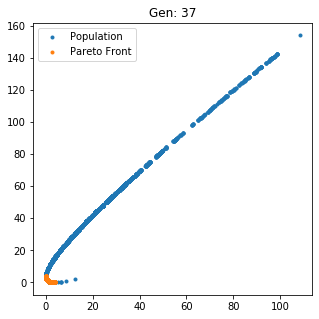

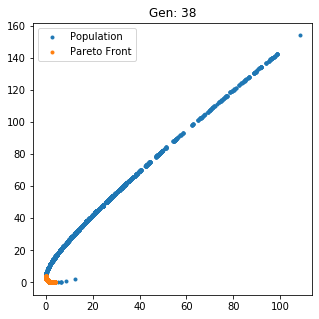

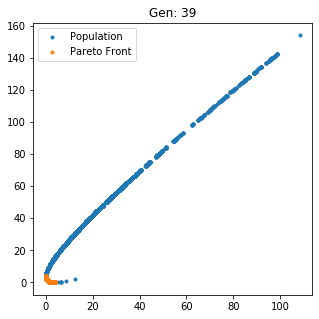

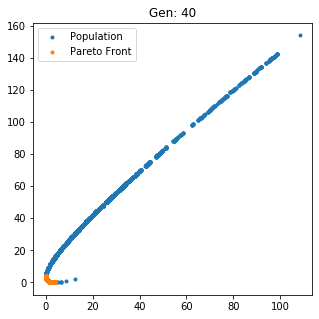

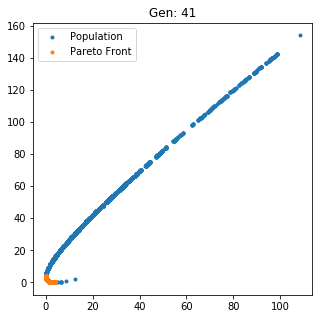

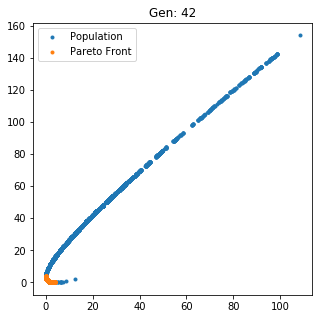

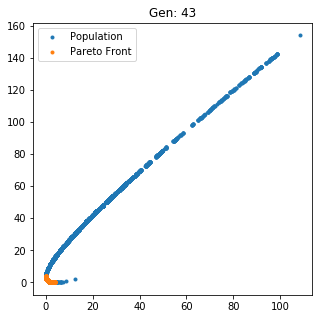

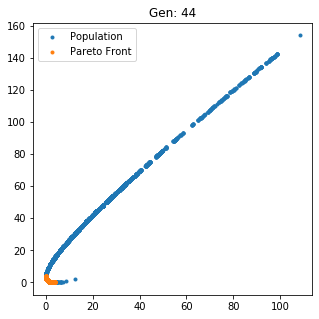

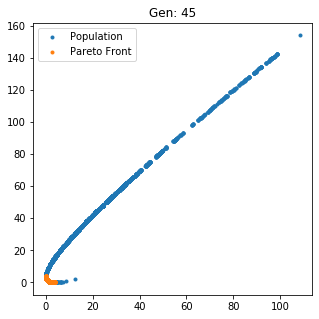

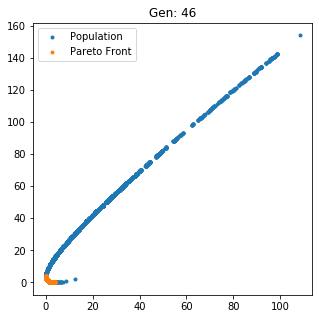

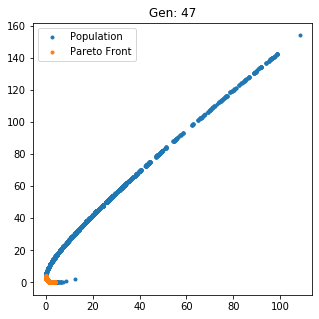

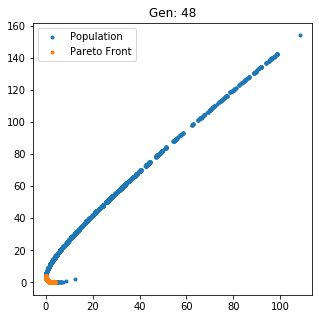

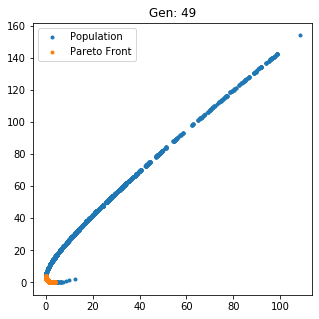

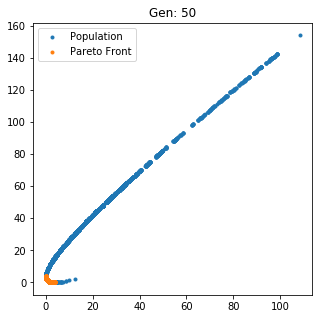

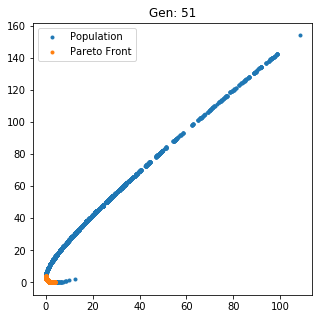

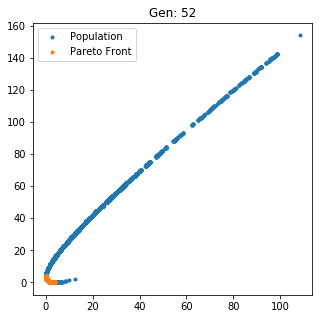

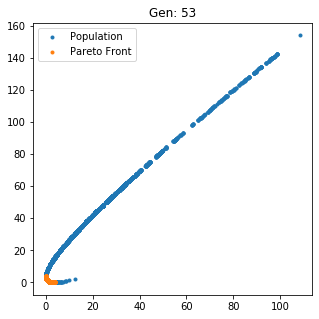

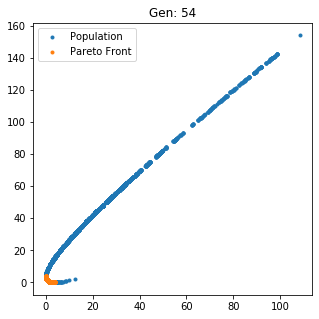

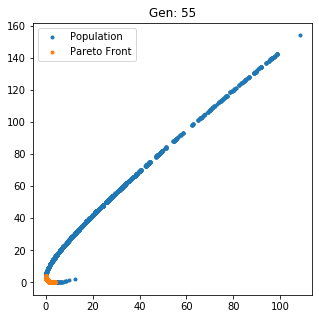

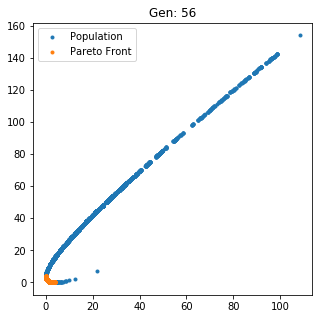

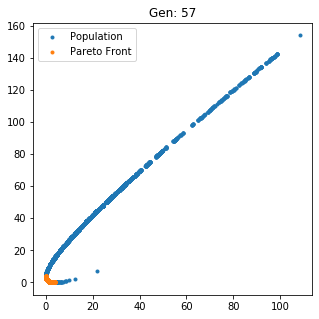

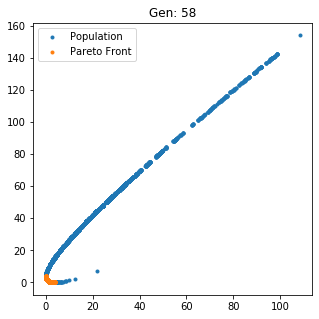

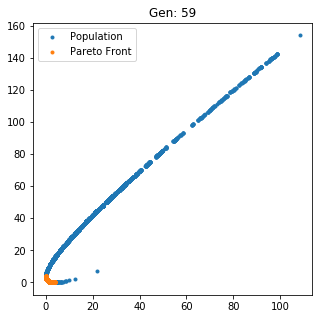

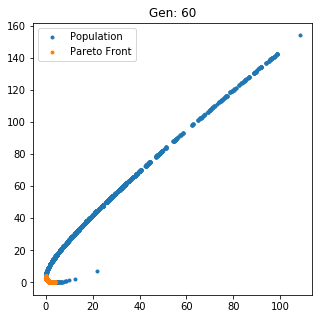

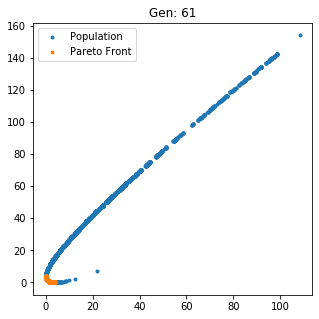

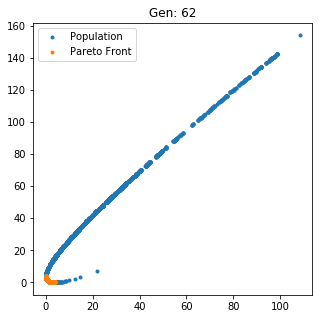

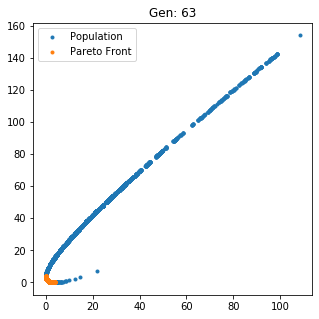

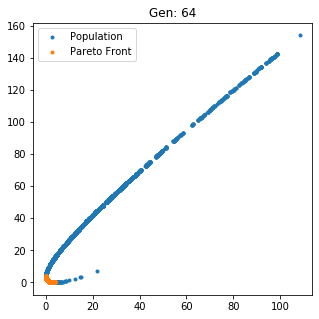

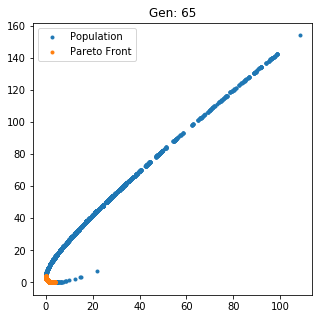

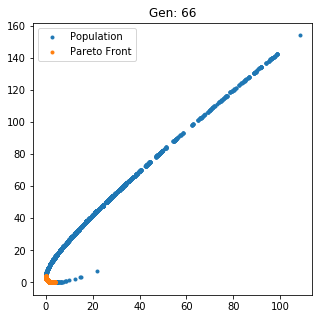

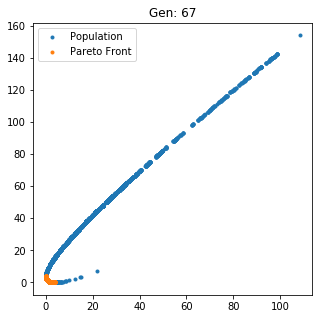

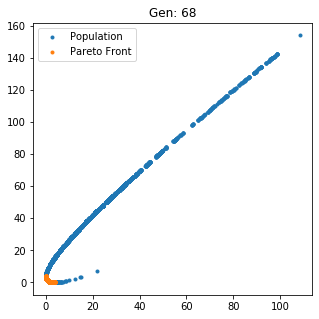

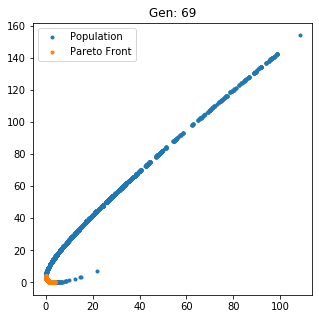

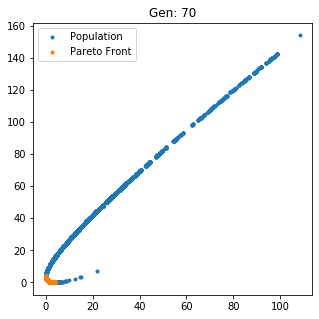

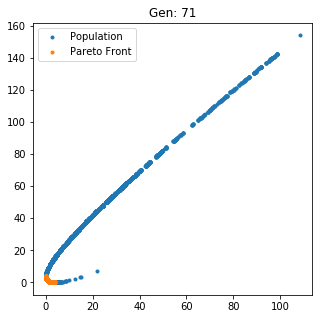

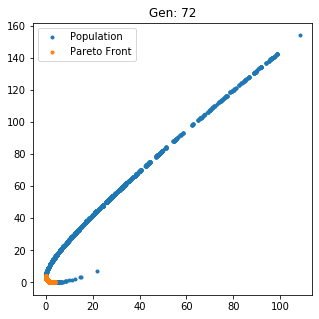

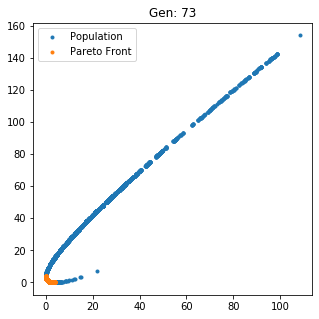

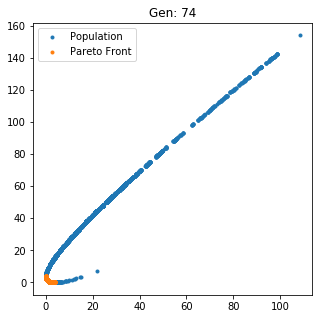

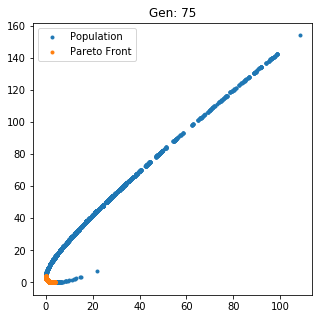

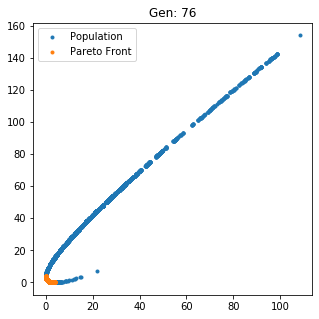

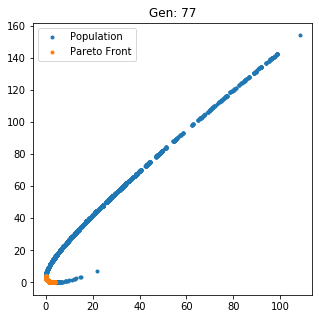

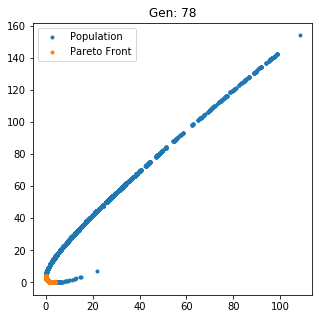

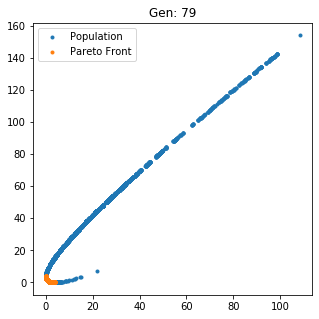

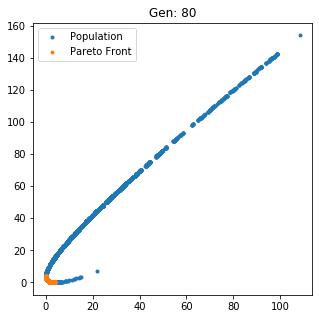

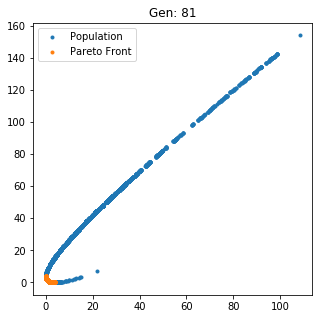

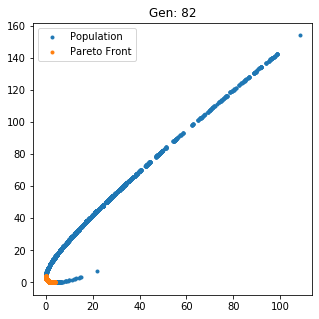

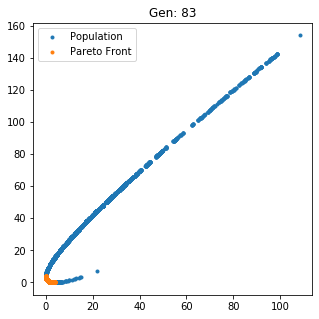

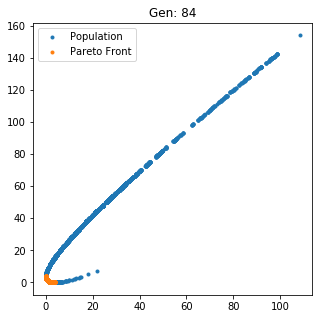

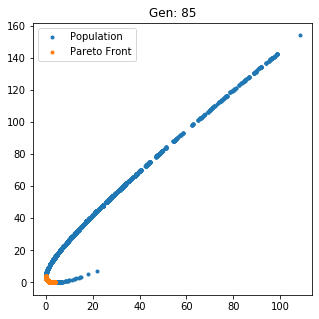

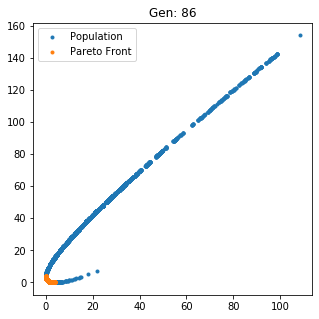

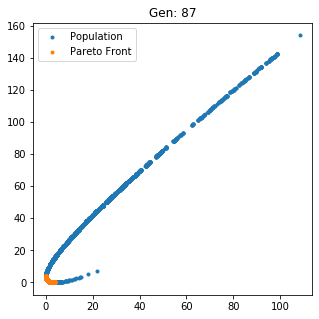

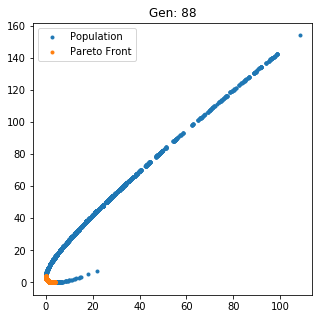

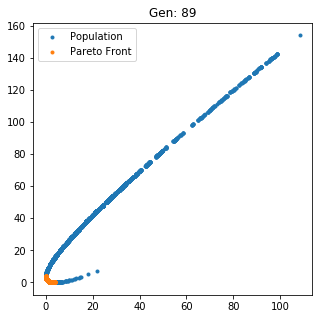

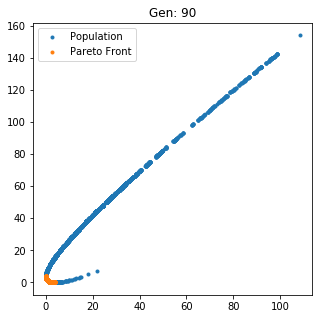

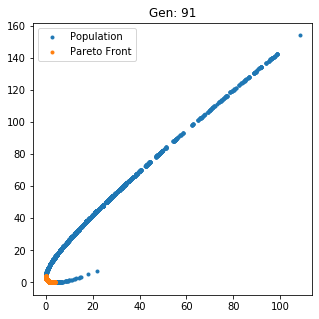

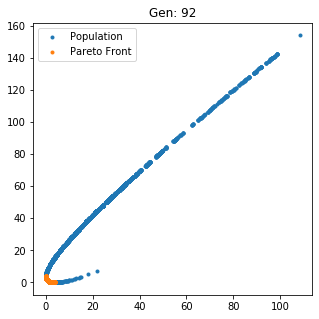

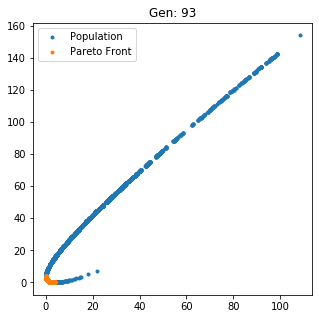

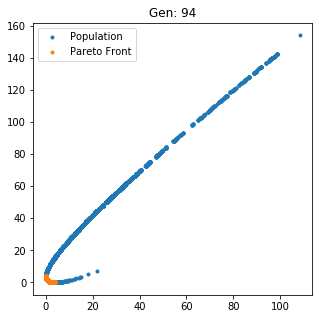

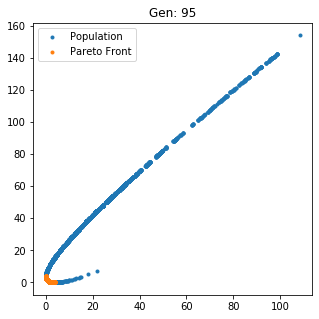

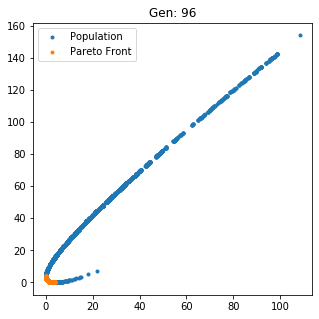

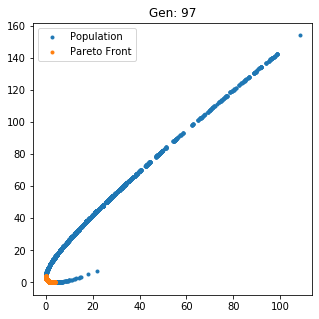

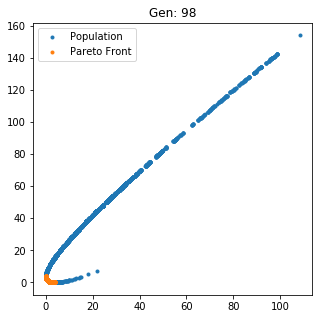

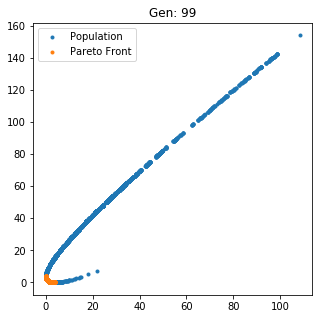

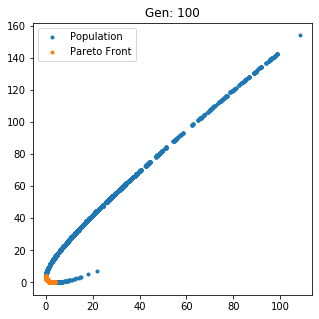

In [153]:
# complétez pour inclure le code (que vous pouvez aussi mettre dans un fichier python) et, surtout, les résultats obtenus
import nsga_2
from deap import benchmarks
importlib.reload(nsga_2)
ngen=100
population,logbook,paretofront = nsga_2.launch_nsga2(ngen=ngen,mu=100,lambda_=200,cxpb=0.6,mutpb=0.3,display=True)

Les individus de la population s'approchent graduaduellement de les solutions pareto-non dominees.

**2-** Reprenez l'expérience du pendule inversé et définissez deux objectifs: l'un étant la somme des valeurs absolue des écarts à la valeur centrale en x, l'autre étant la même chose, mais pour l'angle d'écart à la verticale. Tracez l'évolution de x et de theta pour plusieurs points de départ. Si le pendule n'est pas stabilisé au centre et verticalement, analysez votre fonction de fitness et votre processus d'évaluation et modifiez-les pour corriger le problème. **Vous partirez du code du TME précédent sur le cartpole que vous mettrez dans un fichier `gym_cartpole_2.py`** 

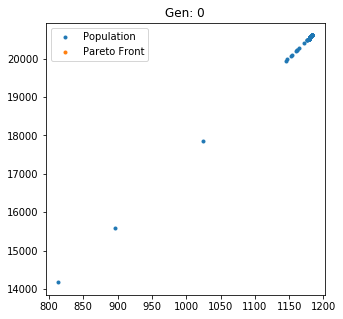

generation  1


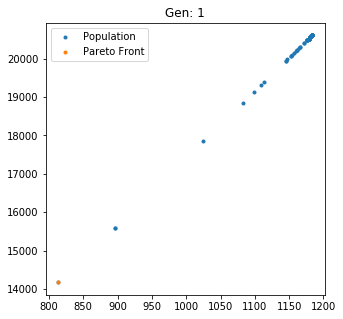

generation  2


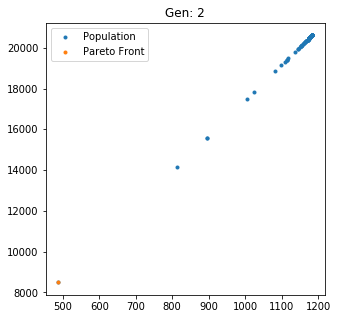

generation  3


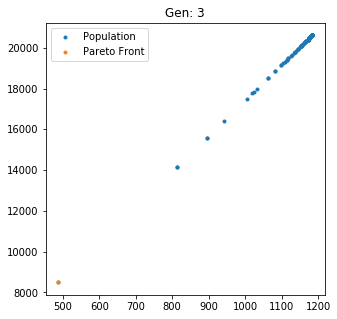

generation  4


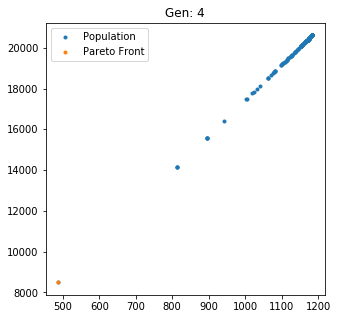

generation  5


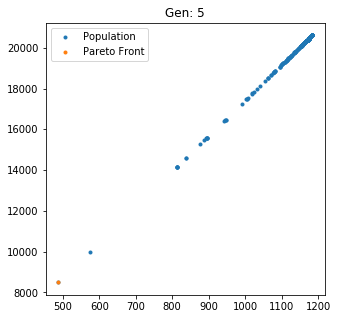

generation  6


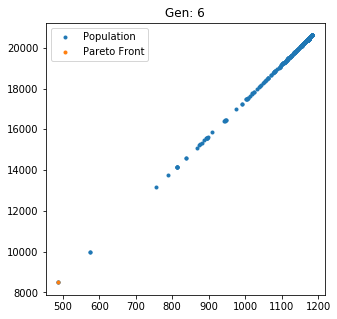

generation  7


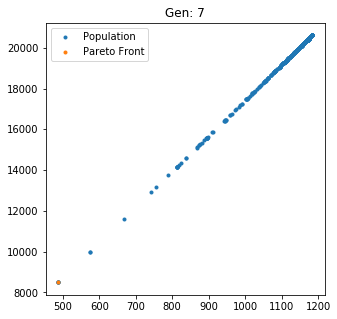

generation  8


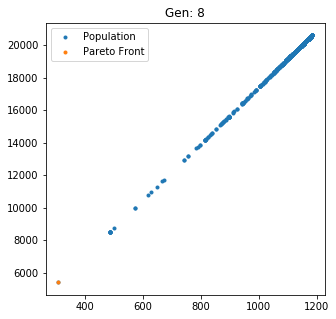

generation  9


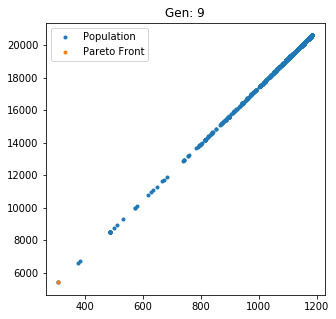

generation  10


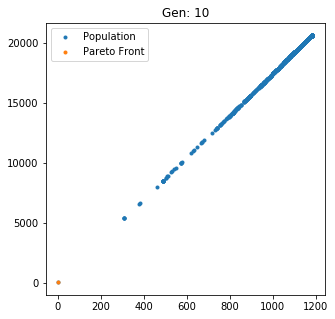

generation  11


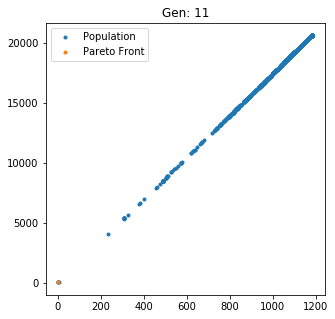

generation  12


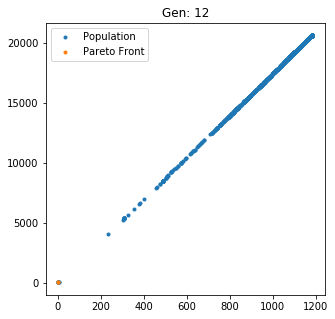

generation  13


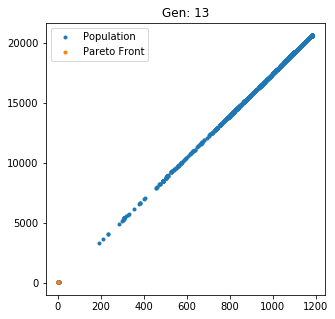

generation  14


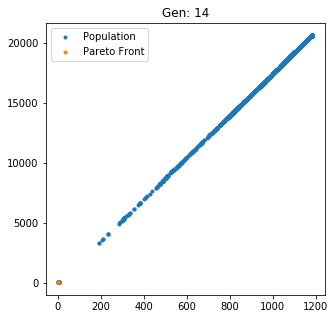

generation  15


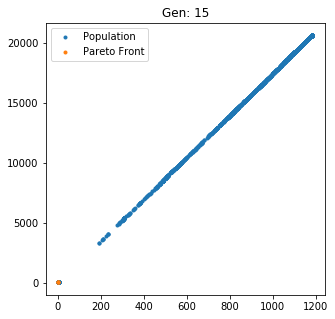

generation  16


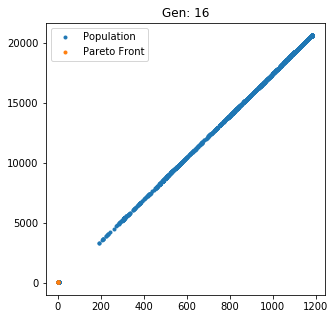

generation  17


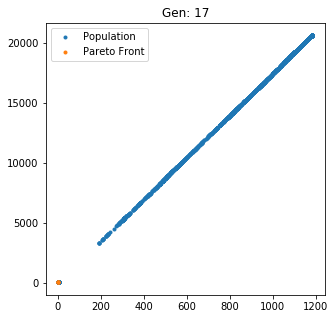

generation  18


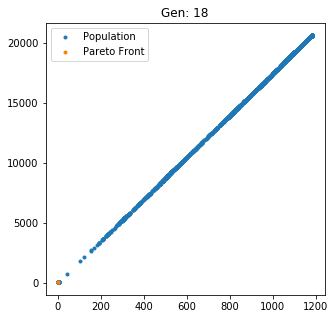

generation  19


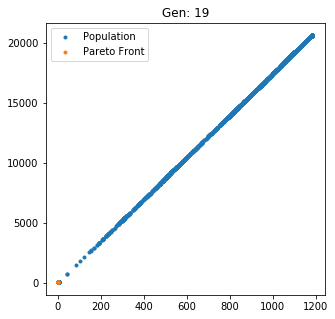

generation  20


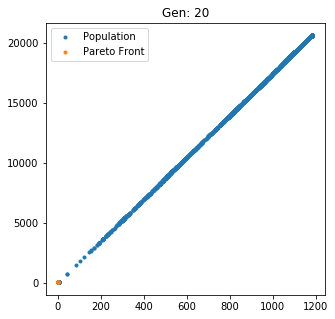

generation  21


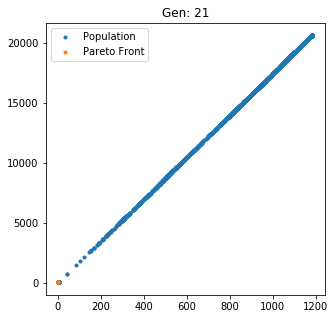

generation  22


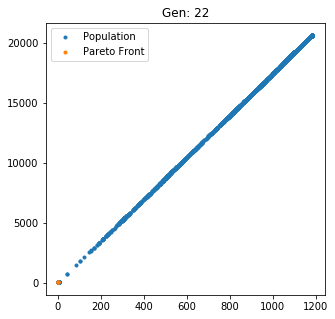

generation  23


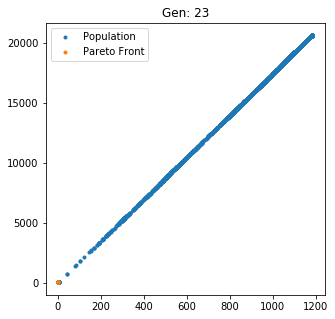

generation  24


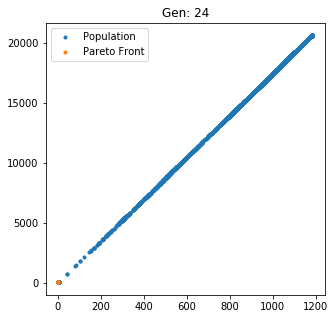

generation  25


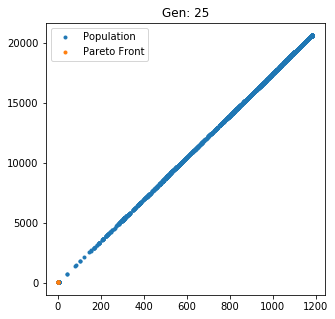

generation  26


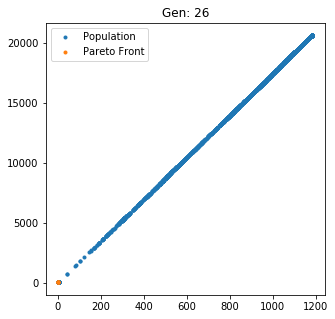

generation  27


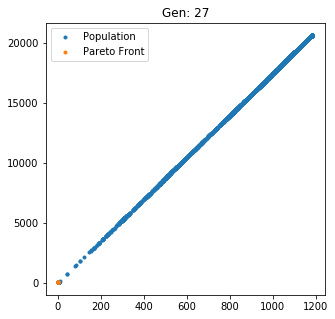

generation  28


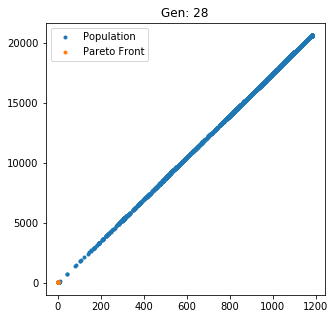

generation  29


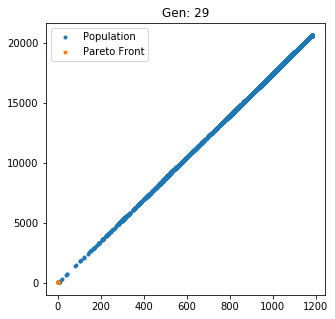

generation  30


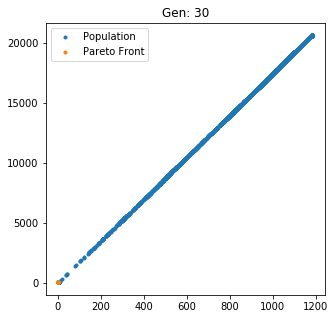

generation  31


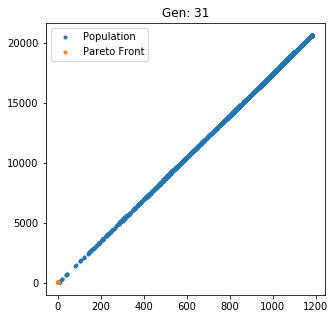

generation  32


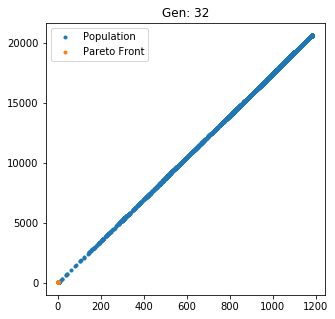

generation  33


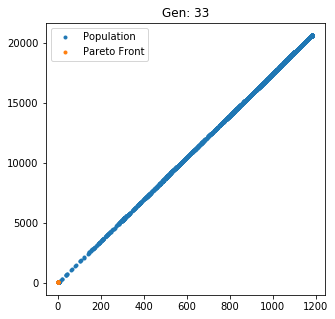

generation  34


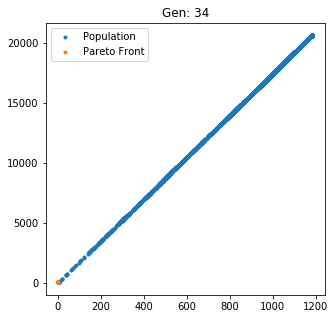

generation  35


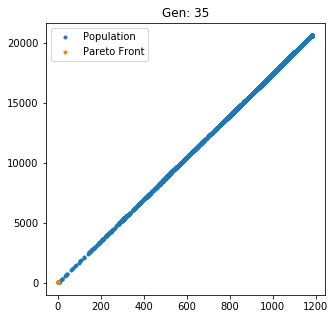

generation  36


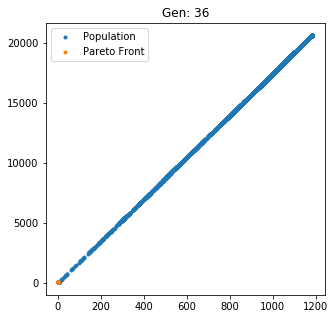

generation  37


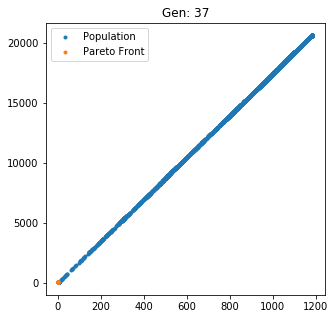

generation  38


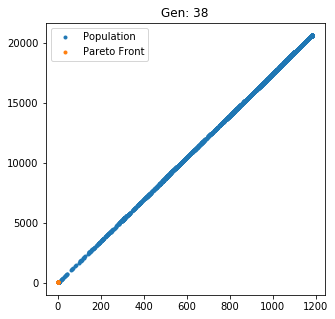

generation  39


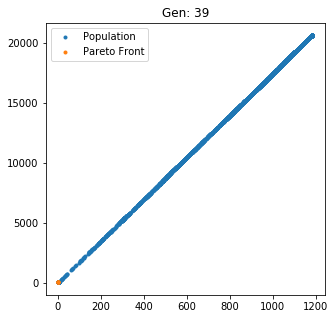

generation  40


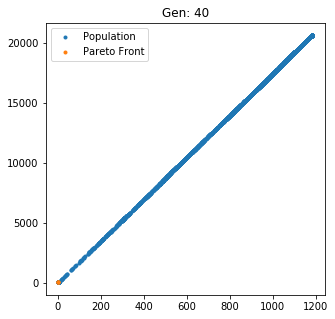

generation  41


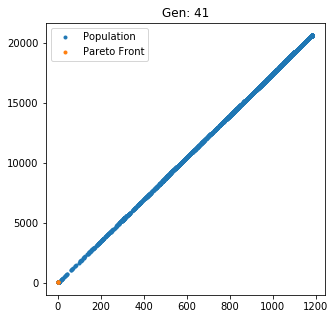

generation  42


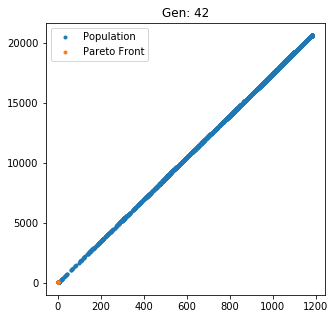

generation  43


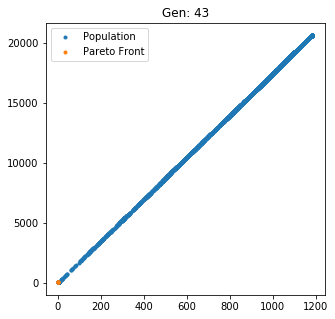

generation  44


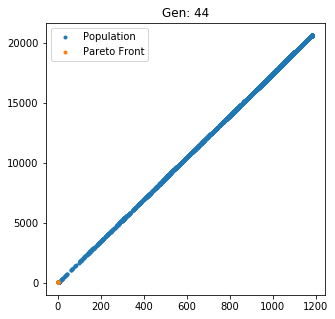

generation  45


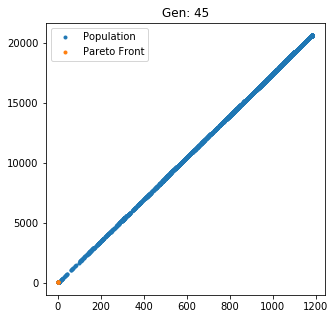

generation  46


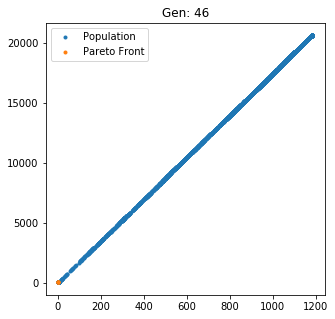

generation  47


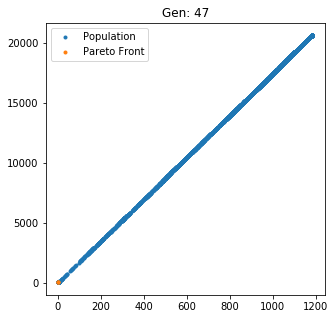

generation  48


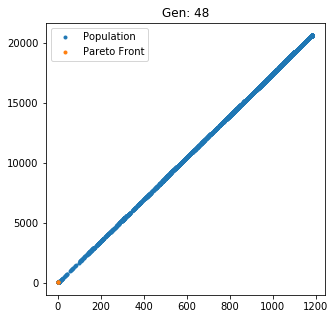

generation  49


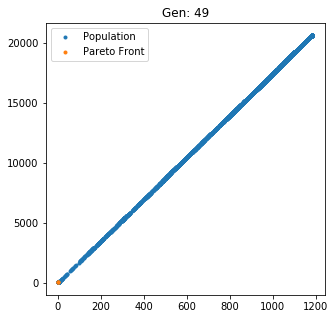

generation  50


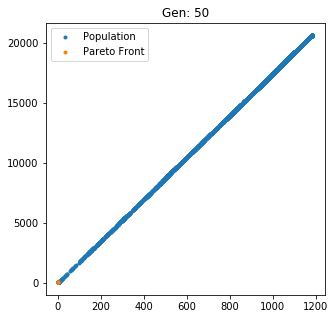

generation  51


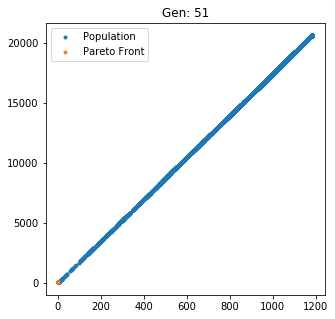

generation  52


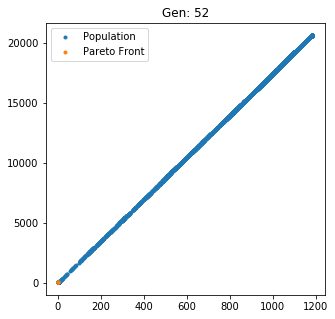

generation  53


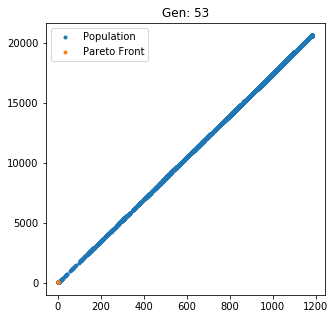

generation  54


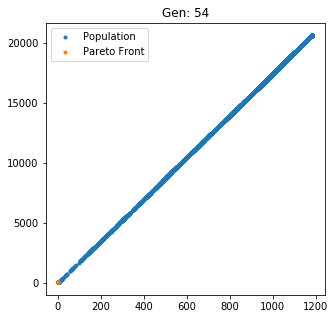

generation  55


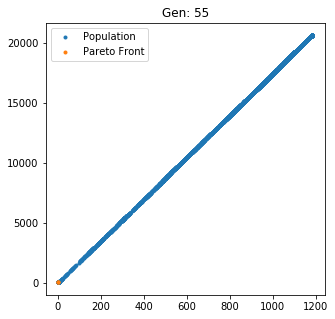

generation  56


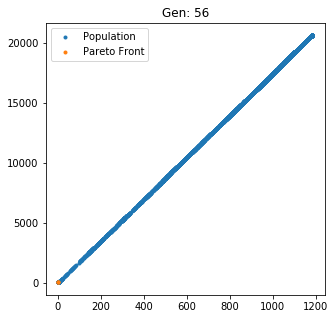

generation  57


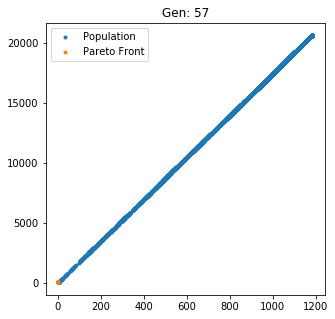

generation  58


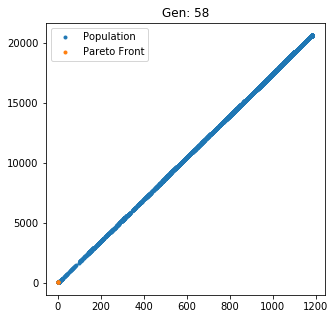

generation  59


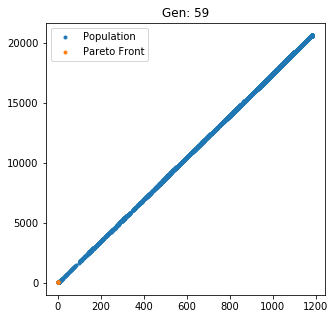

generation  60


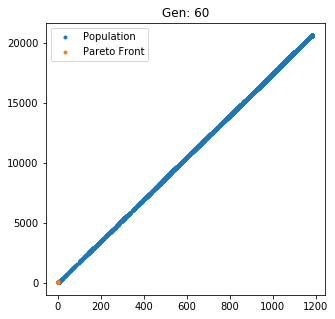

generation  61


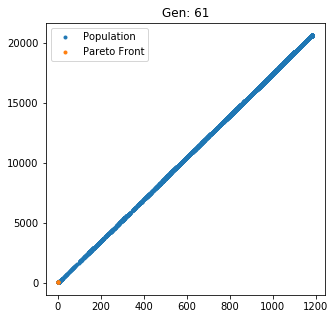

generation  62


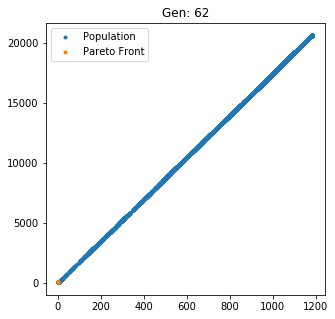

generation  63


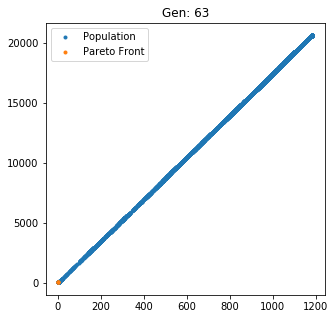

generation  64


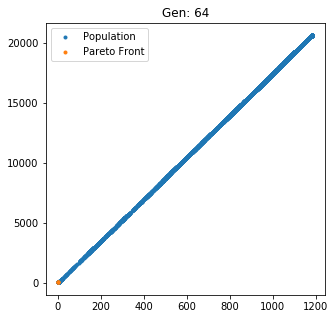

generation  65


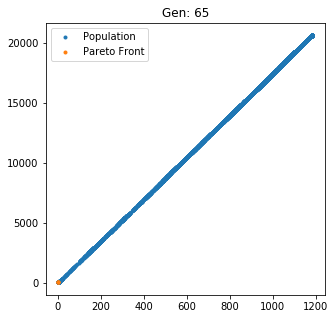

generation  66


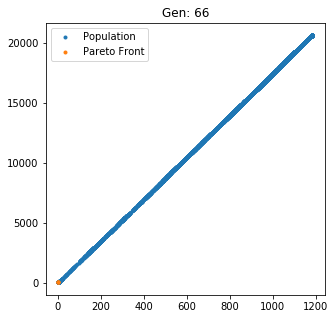

generation  67


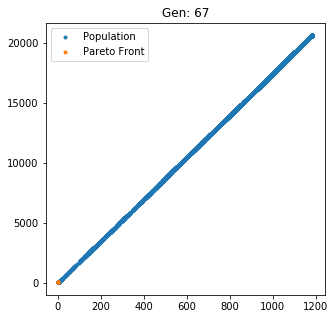

generation  68


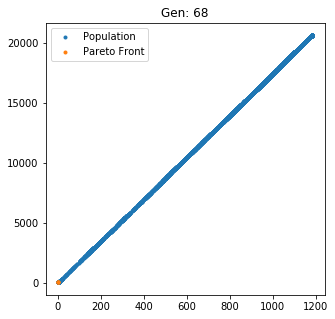

generation  69


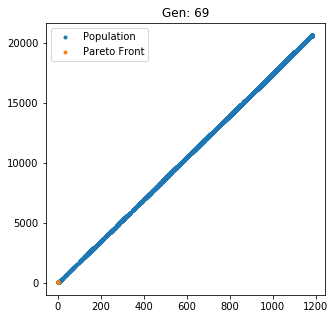

generation  70


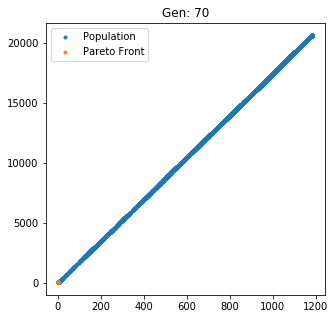

generation  71


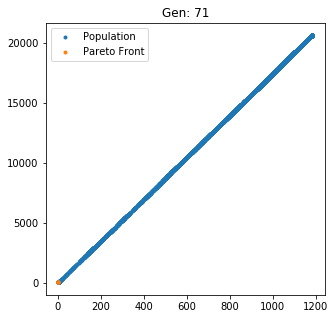

generation  72


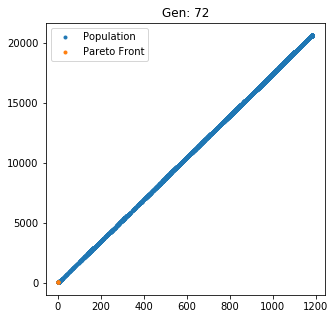

generation  73


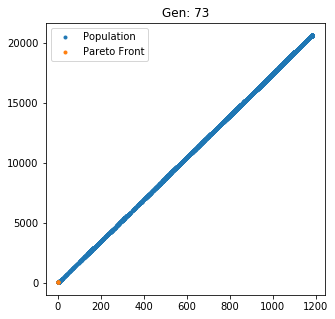

generation  74


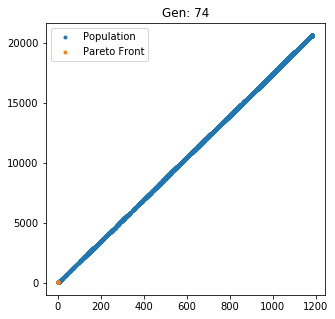

generation  75


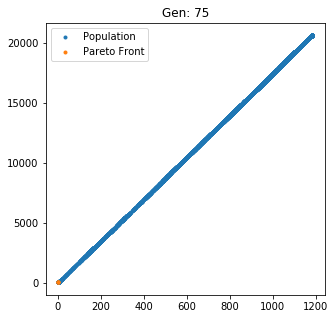

generation  76


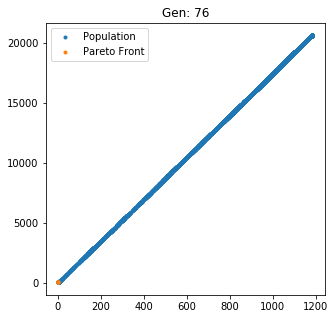

generation  77


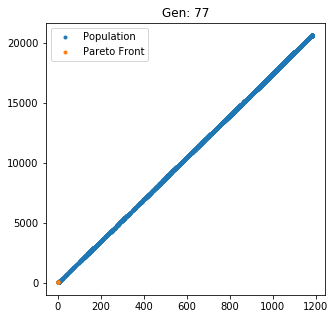

generation  78


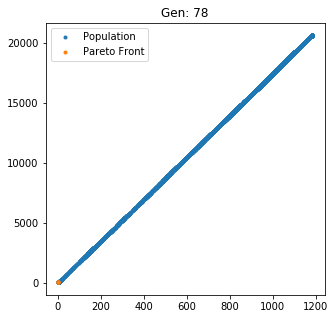

generation  79


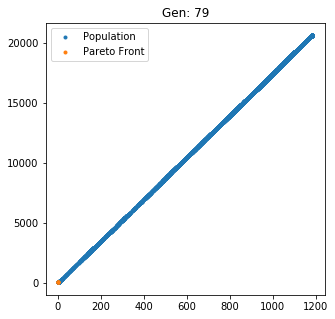

generation  80


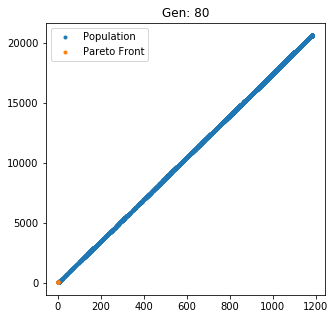

generation  81


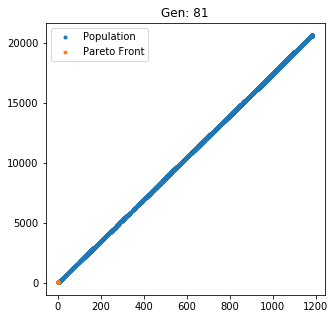

generation  82


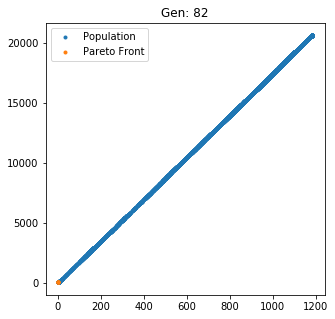

generation  83


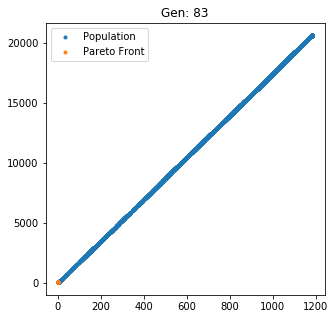

generation  84


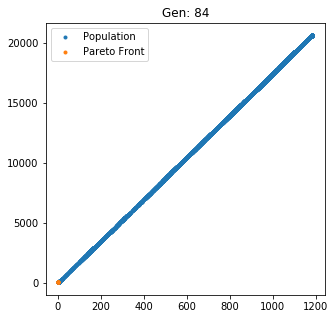

generation  85


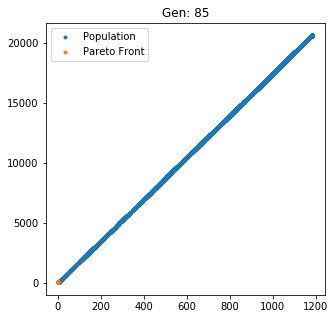

generation  86


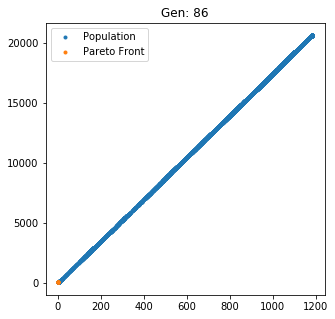

generation  87


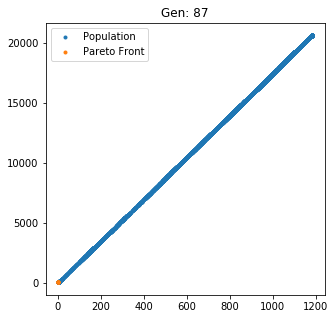

generation  88


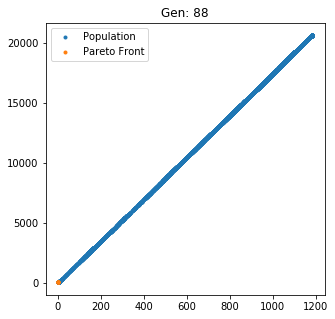

generation  89


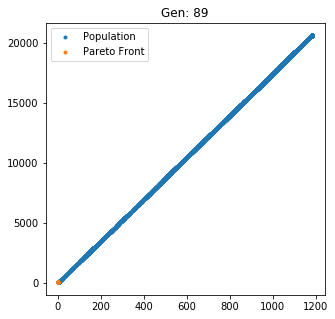

generation  90


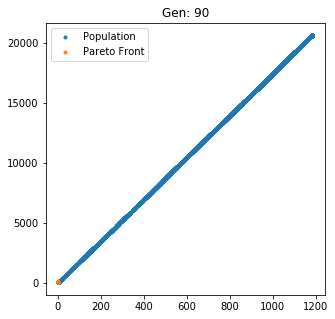

generation  91


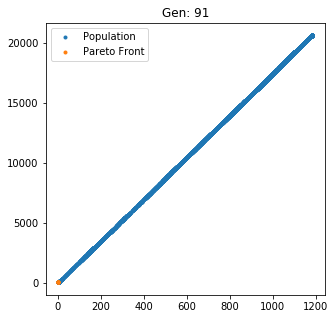

generation  92


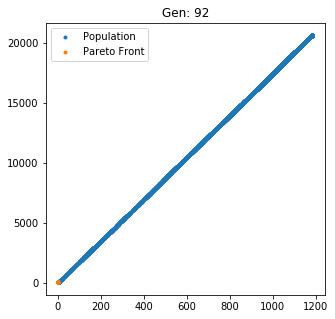

generation  93


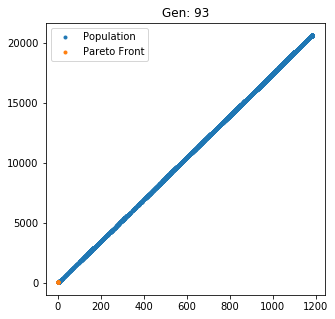

generation  94


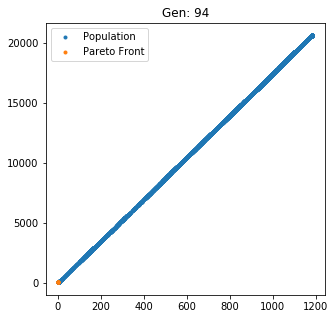

generation  95


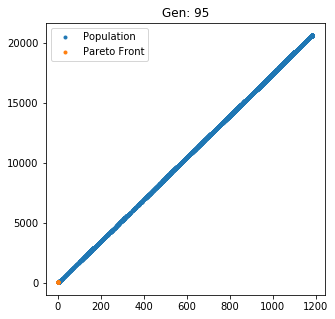

generation  96


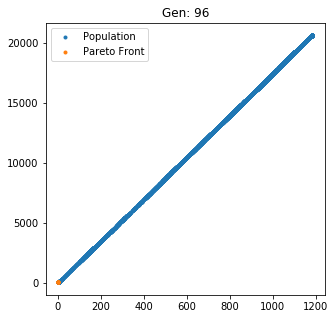

generation  97


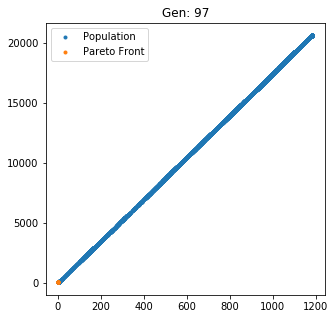

generation  98


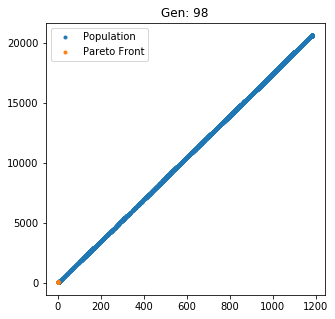

generation  99


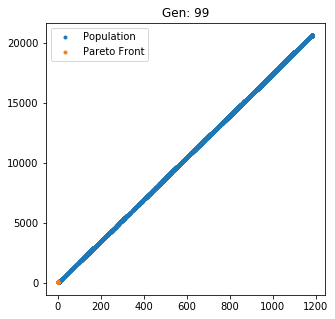

generation  100


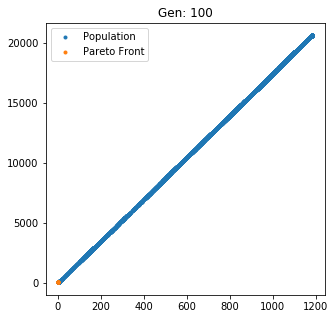

In [154]:
import gym_cartpole_2
import gym
from deap import tools
importlib.reload(gym_cartpole_2)
# gym init
env = gym.make('CartPole-v1')
popfinal, logbook, pareto = gym_cartpole_2.es(env,nb_generation = 100,size_pop=100,lambda_=200,display=True)
env.close()

Avec les deux objectifs donnés dans l'énoncé, les agents ne sont pas stabilisé au centre et verticalement, car un agent qui rate le jeu dès le début pourrait obtenir un score élevé. Ainsi, nous avons ajouter une pénalité de plus pour pénaliser les agents qui finissent tôt. Avec les nouveaux objectifs, les agents apprennent graduellement à jouer ce jeu.

## Fitness & Nouveauté

L'environnement `FastsimSimpleNavigation-v0` de gym_fastsim permet de lancer des expériences de navigation avec un robot à roues naviguant dans un labyrinthe. Vous allez dans cette partie reproduire les expériences de Lehman et Stanley sur la recherche de nouveauté. Pour installer gym_fastsim, vous aurez tout d'abord besoin d'installer pyfastsim grâce au script utilisé pendant un TME précédent (https://github.com/benoit-girard/TME-NavigationStrategies.git). Vous devrez ensuite installer gym (pip3 install --user gym) et gym_fastsim (https://github.com/alexendy/fastsim_gym.git: git clone et pip3 install . dans le répertoire fastsim_gym).

**1-**  Lancer une première expérience dans laquelle le robot doit atteindre la sortie du labyrinthe. Vous pourrez essayer avec la reward de l'expérience, qui est 

une reward binaire (sortie atteinte ou non) et avec 

une fitness plus continue dans laquelle la récompense est la distance à la sortie 

(à minimiser donc). Pour observer le comportement de la recherche effectuée, vous pourrez écrire les positions du robot et ensuite tracer ces positions avec la fonction `plot_traj_file`. Remarque: il y a 2000 positions par évaluation. Pour limiter la taille du fichier, vous pourrez n'écrire qu'une position sur 100, par exemple. Vous pourrez aussi utiliser cette fonction pour tracer des trajectoires individuelles. 

Tracez ci-dessous au moins 3 exemples de positions explorées par 3 expériences différentes.

Quelles parties de l'espace ont été explorées dans les deux cas ? Est-ce que la sortie est atteinte (vous vous limiterez à 200 générations) ? Si oui, au bout de combien de générations ? ** Vous complèterez le code fourni dans `gym_fastsim.py` (variante "Fit")**.

generation  1
generation  2
generation  3
generation  4
generation  5
generation  6
generation  7
generation  8
generation  9
generation  10
generation  11
generation  12
generation  13
generation  14
generation  15
generation  16
generation  17
generation  18
generation  19
generation  20
generation  21
generation  22
generation  23
generation  24
generation  25
generation  26
generation  27
generation  28
generation  29
generation  30
generation  31
generation  32
generation  33
generation  34
generation  35
generation  36
generation  37
generation  38
generation  39
generation  40
generation  41
generation  42
generation  43
generation  44
generation  45
generation  46
generation  47
generation  48
generation  49
generation  50
generation  50
generation  51
generation  52
generation  53
generation  54
generation  55
generation  56
generation  57
generation  58
generation  59
generation  60
generation  61
generation  62
generation  63
generation  64
generation  65
generation  66
gene

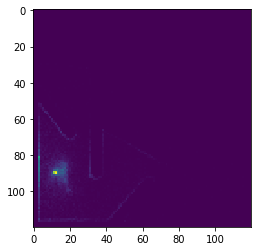

La sortie n'est pas atteinte.


In [157]:
# Experience 1
import os
import maze_plot
import plot
import gym_fastsim_3, gym
importlib.reload(gym_fastsim_3)

env = gym.make('FastsimSimpleNavigation-v0')
_,_,_,position_record,but_atteint,but_gen = gym_fastsim_3.launch_nsga2(env,"FIT",nb_generation=200, size_pop=100)
env.close()
path = "log/FIT_1_position_record_09_nov_01_03"
plo(position_record,path)
stock(position_record,path)
if but_atteint:
    print("La sortie est atteinte au bout de {} generations.".format(but_gen))
else:
    print("La sortie n'est pas atteinte.")


In [ ]:
# Experience 2
env = gym.make('FastsimSimpleNavigation-v0')
_,_,_,position_record,but_atteint,but_gen = gym_fastsim_3.launch_nsga2(env,"FIT",nb_generation=200, size_pop=100)
env.close()
path = "log/FIT_2_position_record_09_nov_01_03"
plo(position_record,path)
stock(position_record,path)
if but_atteint:
    print("La sortie est atteinte au bout de {} generations.".format(but_gen))
else:
    print("La sortie n'est pas atteinte.")

In [ ]:
# Experience 3
env = gym.make('FastsimSimpleNavigation-v0')
_,_,_,position_record,but_atteint,but_gen = gym_fastsim_3.launch_nsga2(env,"FIT",nb_generation=200, size_pop=100)
env.close()
path = "log/FIT_3_position_record_09_nov_01_03"
plo(position_record,path)
stock(position_record,path)
if but_atteint:
    print("La sortie est atteinte au bout de {} generations.".format(but_gen))
else:
    print("La sortie n'est pas atteinte.")

_inclure ici quelques commentaires sur vos résultats_

**2-** Implémentez la même expérience, mais en utilisant le critère de nouveauté à la place de la fitness. Vous utiliserez pour cela le code fourni dans `novelty_search.py`. 

La recherche de nouveauté s'appuie sur des descripteurs comportementaux et cherche à maximiser la distance aux plus proches voisins parmi la population et une archive des individus rencontrés. Le calcul du critère de nouveauté doit donc être réalisé après l'évaluation de tous les individus. 

Implémentez la recherche de nouveauté, observez les positions explorées et comparez les aux expériences précédentes. Est-ce que la sortie est atteinte ? Si oui, au bout de combien de générations ? ** Vous complèterez le code fourni dans `gym_fastsim.py` (variante "NS")**.

generation  1
generation  2
generation  3
generation  4
generation  5
generation  6
generation  7
generation  8
generation  9
generation  10
generation  11
generation  12
generation  13
generation  14
generation  15
generation  16
generation  17
generation  18
generation  19
generation  20
generation  21
generation  22
generation  23
generation  24
generation  25
generation  26
generation  27
generation  28
generation  29
generation  30
generation  31
generation  32
generation  33
generation  34
generation  35
generation  36
generation  37
generation  38
generation  39
generation  40
generation  41
generation  42
generation  43
generation  44
generation  45
generation  46
generation  47
generation  48
generation  49
generation  50
generation  50
generation  51
generation  52
generation  53
generation  54
generation  55
generation  56
generation  57
generation  58
generation  59
generation  60
generation  61
generation  62
generation  63
generation  64
generation  65
generation  66
gene

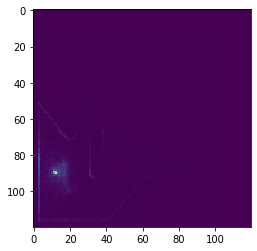

La sortie n'est pas atteinte.


In [158]:
# experience 1
import os
import maze_plot
import plot
import gym_fastsim_3, gym
importlib.reload(gym_fastsim_3)

env = gym.make('FastsimSimpleNavigation-v0')
_,_,_,position_record,but_atteint,but_gen = gym_fastsim_3.launch_nsga2(env,"NS",nb_generation=200, size_pop=100)
env.close()
path = "log/NS_1_position_record_09_nov_02_06"
plo(position_record,path)
stock(position_record,path)
if but_atteint:
    print("La sortie est atteinte au bout de {} generations.".format(but_gen))
else:
    print("La sortie n'est pas atteinte.")

In [ ]:
# experience 2
env = gym.make('FastsimSimpleNavigation-v0')
nb_generation=50
size_pop=100
pb_crossover=0.1
pb_mutation=0.9
_,_,_,position_record,but_atteint,but_gen = gym_fastsim_3.launch_nsga2(env,"NS",nb_generation=nb_generation, size_pop=size_pop,pb_crossover=pb_crossover,pb_mutation=pb_mutation)
env.close()
path = "log/NS_2_position_record_09_nov_02_06"
plo(position_record,path)
stock(position_record,path)
if but_atteint:
    print("La sortie est atteinte au bout de {} generations.".format(but_gen))
else:
    print("La sortie n'est pas atteinte.")

In [ ]:
# experience 3
env = gym.make('FastsimSimpleNavigation-v0')
_,_,_,position_record,but_atteint,but_gen = gym_fastsim_3.launch_nsga2(env,"NS",nb_generation=200, size_pop=100)
env.close()
path = "log/NS_3_position_record_09_nov_02_06"
plo(position_record,path)
stock(position_record,path)
if but_atteint:
    print("La sortie est atteinte au bout de {} generations.".format(but_gen))
else:
    print("La sortie n'est pas atteinte.")

_inclure ici quelques commentaires sur vos résultats_

**3-** Faites des expériences avec, à la fois la fitness et le critère de nouveauté. Quelles sont les positions explorées ? Est-ce que la sortie est atteinte ? Si oui, au bout de combien de générations ? ** Vous complèterez le code fourni dans `gym_fastsim.py` (variante "Fit+NS")**.

In [ ]:
import os
import maze_plot
import plot
import gym_fastsim_3, gym
importlib.reload(gym_fastsim_3)
# experience 1
env = gym.make('FastsimSimpleNavigation-v0')
_,_,_,position_record,but_atteint,but_gen = gym_fastsim_3.launch_nsga2(env,"FIT+NS",nb_generation=200, size_pop=100)
env.close()
path = "log/FITNS_1_position_record_09_nov_03_00"
plo(position_record,path)
stock(position_record,path)
if but_atteint:
    print("La sortie est atteinte au bout de {} generations.".format(but_gen))
else:
    print("La sortie n'est pas atteinte.")


In [ ]:
# experience 2
env = gym.make('FastsimSimpleNavigation-v0')
_,_,_,position_record,but_atteint,but_gen = gym_fastsim_3.launch_nsga2(env,"FIT+NS",nb_generation=200, size_pop=100)
env.close()
path = "log/FITNS_2_position_record_09_nov_03_00"
plo(position_record,path)
stock(position_record,path)
if but_atteint:
    print("La sortie est atteinte au bout de {} generations.".format(but_gen))
else:
    print("La sortie n'est pas atteinte.")


In [ ]:
#experience 3
env = gym.make('FastsimSimpleNavigation-v0')
_,_,_,position_record,but_atteint,but_gen = gym_fastsim_3.launch_nsga2(env,"FIT+NS",nb_generation=200, size_pop=100)
env.close()
path = "log/FITNS_3_position_record_09_nov_03_00"
plo(position_record,path)
stock(position_record,path)
if but_atteint:
    print("La sortie est atteinte au bout de {} generations.".format(but_gen))
else:
    print("La sortie n'est pas atteinte.")


_inclure ici quelques commentaires sur vos résultats_

Si vous avez fini en avance, profitez du temps restant pour lancer d'autres instances de vos expériences et générer des résultats plus solides.

## Optionnel

Faites le même genre d'expériences avec d'autres environnement de gym, par exemple le BipedalWalker.